In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [20]:
df = pd.read_csv('Crop_recommendation.csv')

In [21]:
print(df.head())
print(df.dtypes)

   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object


In [22]:
print(df.isna().sum())
print(df.isnull().sum())

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64
Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [23]:
crop_categories = df['Crop'].astype('category').cat.categories
print("\nMapping kategori ke kode:")
for i, category in enumerate(crop_categories):
    print(f"{category}: {i}")


Mapping kategori ke kode:
Apple: 0
Banana: 1
Blackgram: 2
ChickPea: 3
Coconut: 4
Coffee: 5
Cotton: 6
Grapes: 7
Jute: 8
KidneyBeans: 9
Lentil: 10
Maize: 11
Mango: 12
MothBeans: 13
MungBean: 14
Muskmelon: 15
Orange: 16
Papaya: 17
PigeonPeas: 18
Pomegranate: 19
Rice: 20
Watermelon: 21


In [24]:
df['Crop'] = df['Crop'].astype('category').cat.codes
print(df['Crop'].unique())

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [25]:
df.drop_duplicates(inplace=True)
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


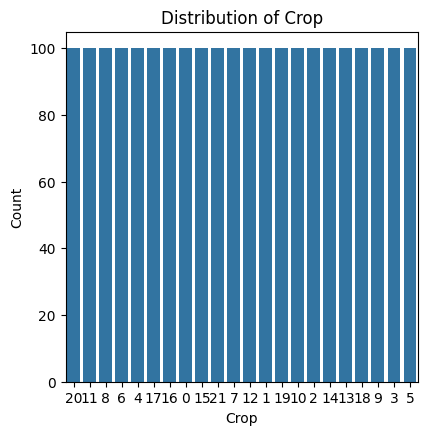

In [26]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Crop', data=df, order=df['Crop'].value_counts().index)
plt.title('Distribution of Crop')
plt.xlabel('Crop')
plt.ylabel('Count')

plt.show()

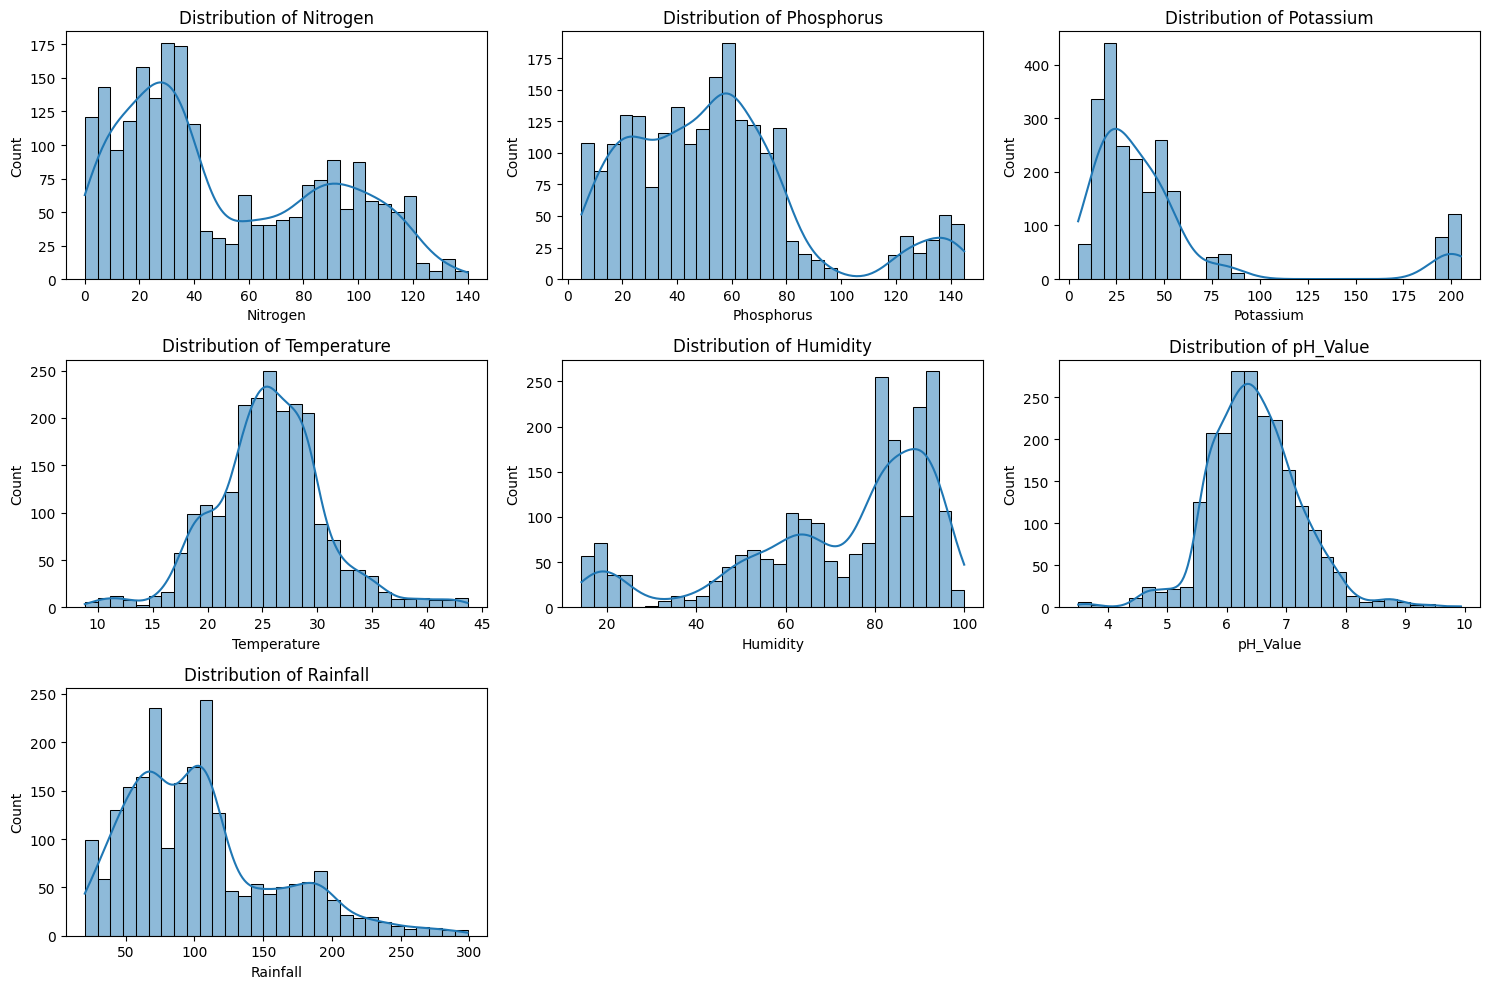

In [27]:
features = df.columns[:-1]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

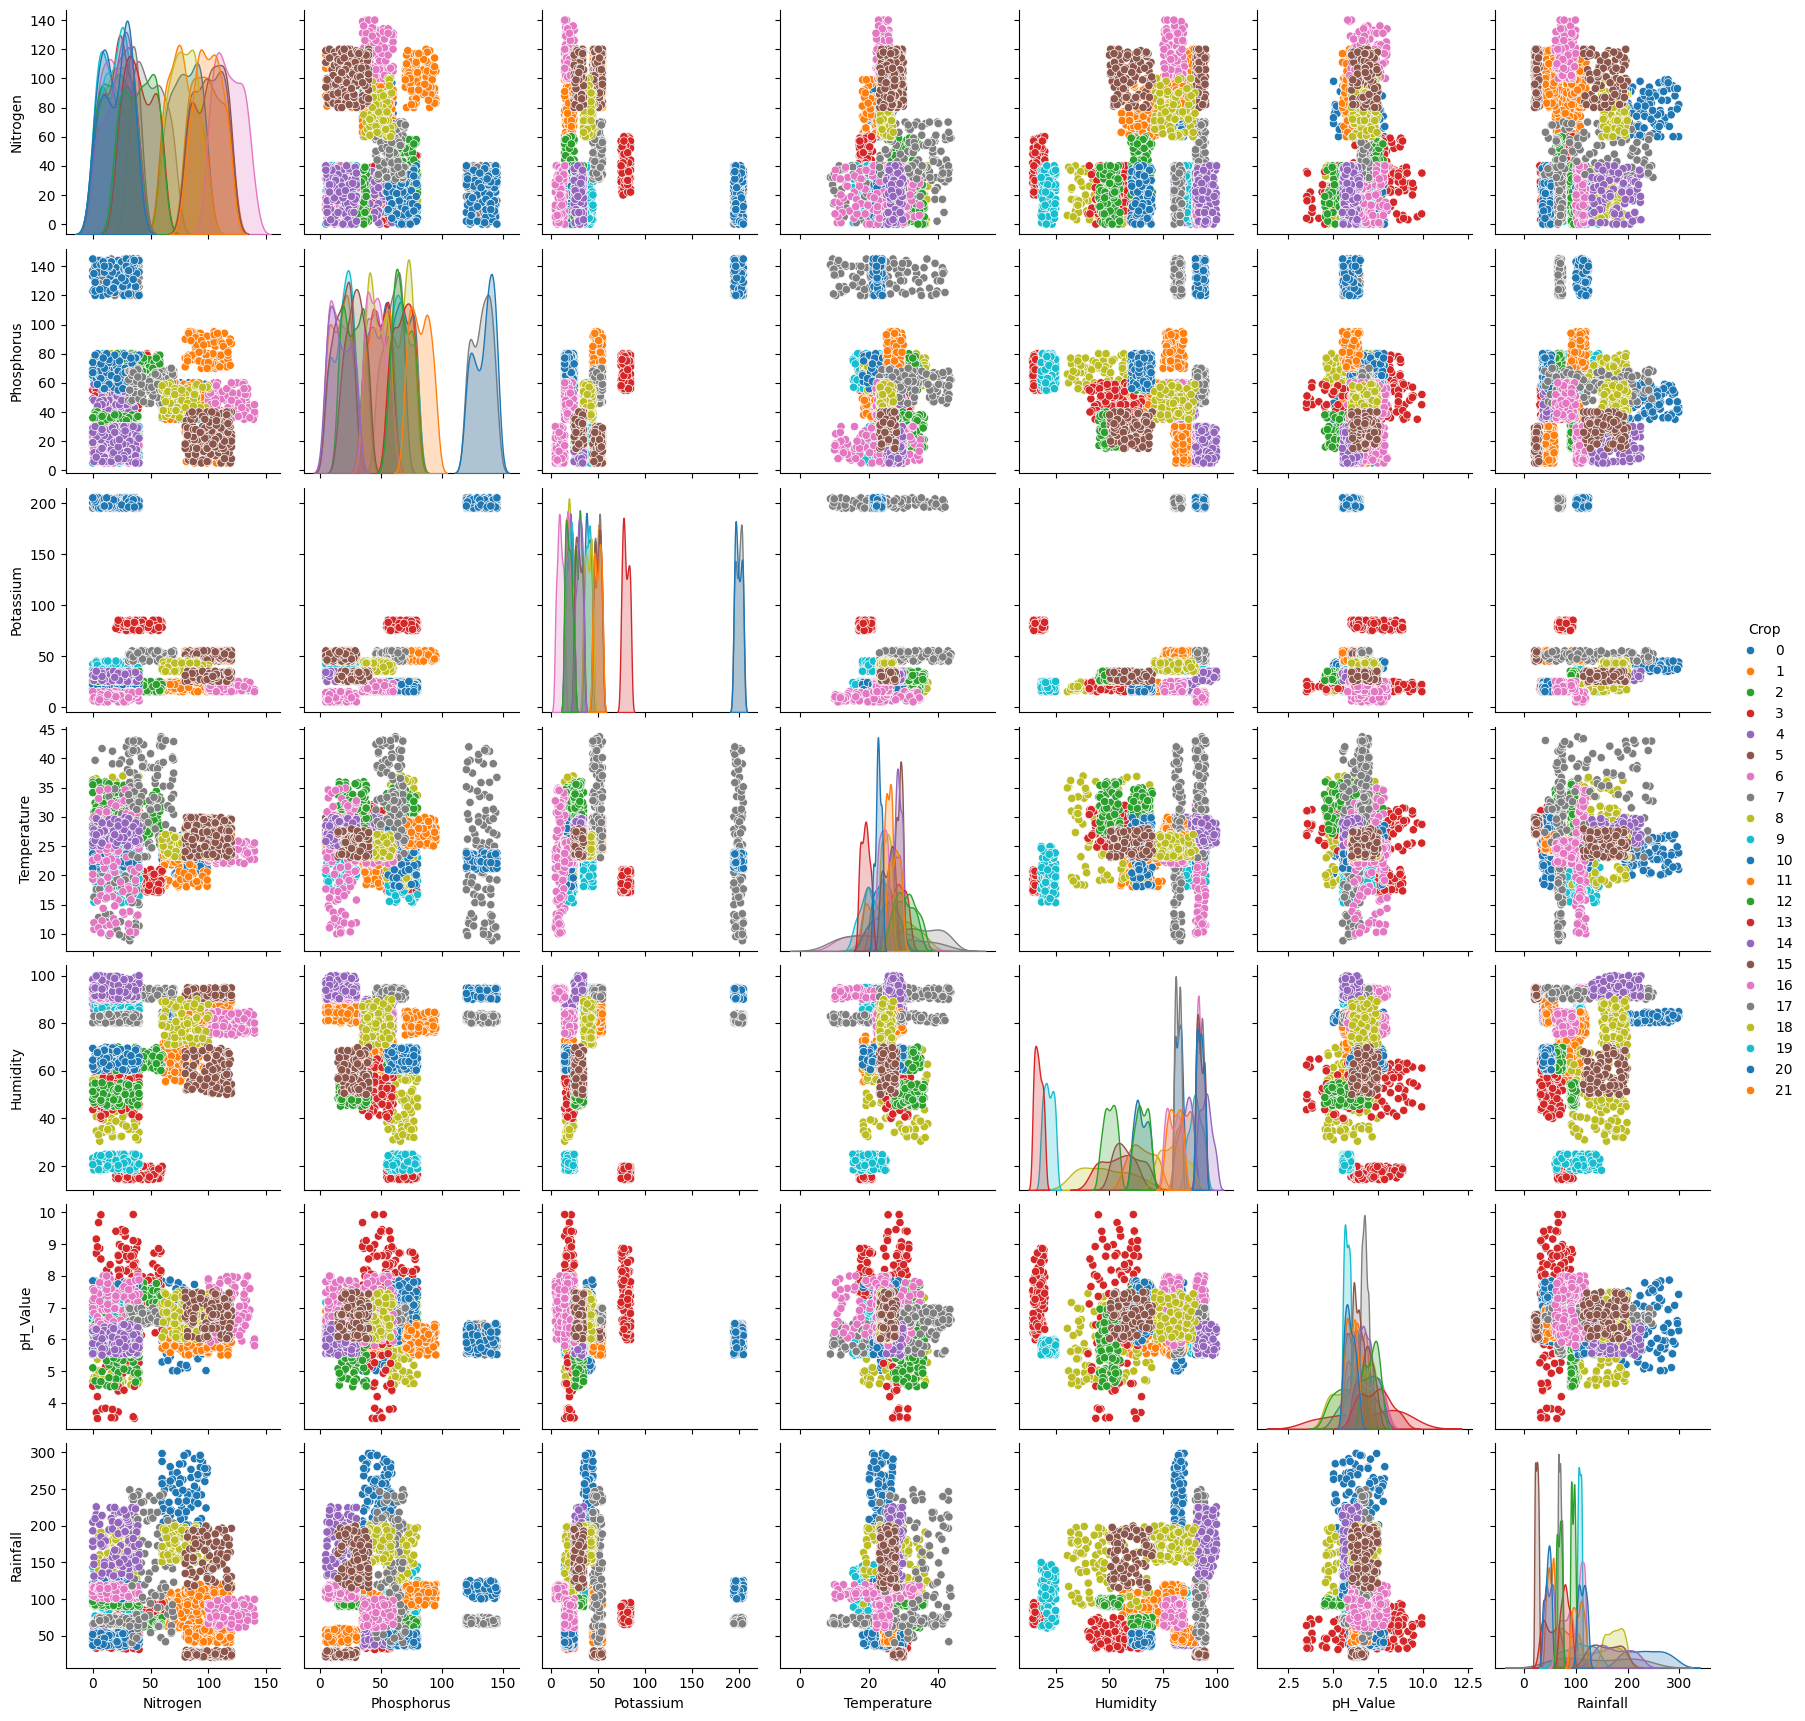

In [28]:
sns.pairplot(df, hue='Crop', palette='tab10')
plt.show()

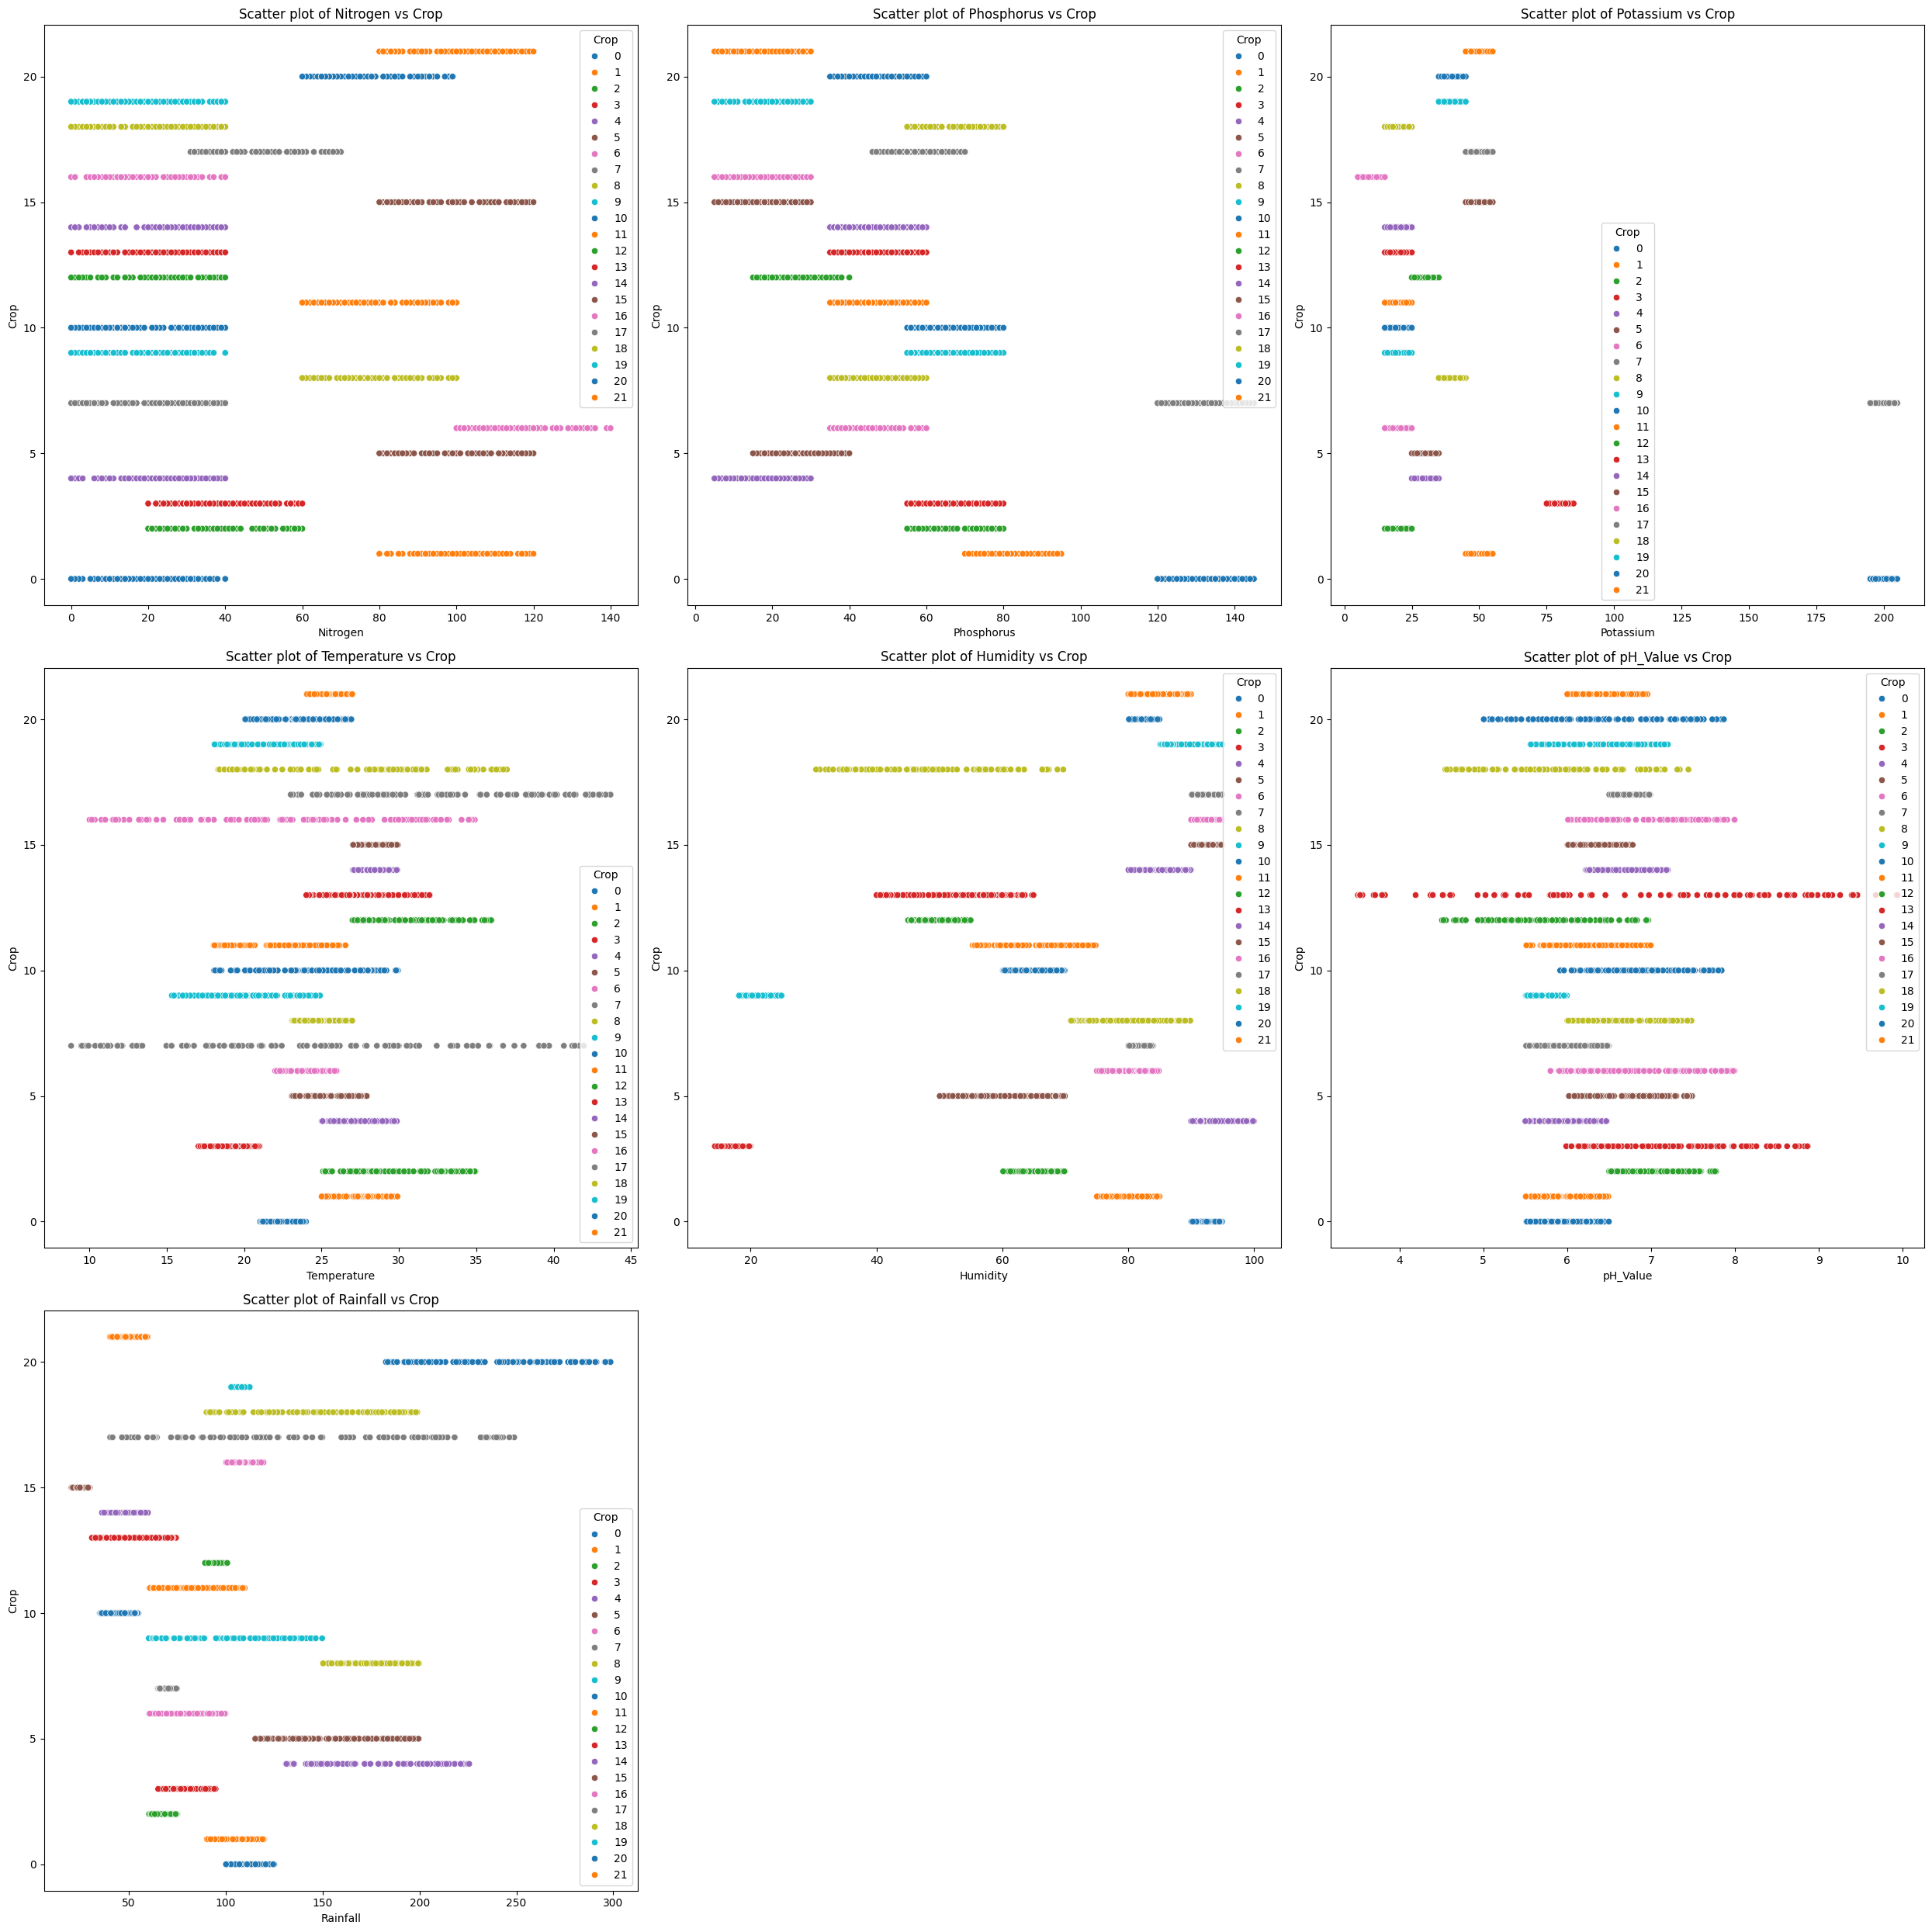

In [29]:
plt.figure(figsize=(25, 25))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y='Crop', hue='Crop', palette='tab10')
    plt.title(f'Scatter plot of {feature} vs Crop')
plt.tight_layout()
plt.show()

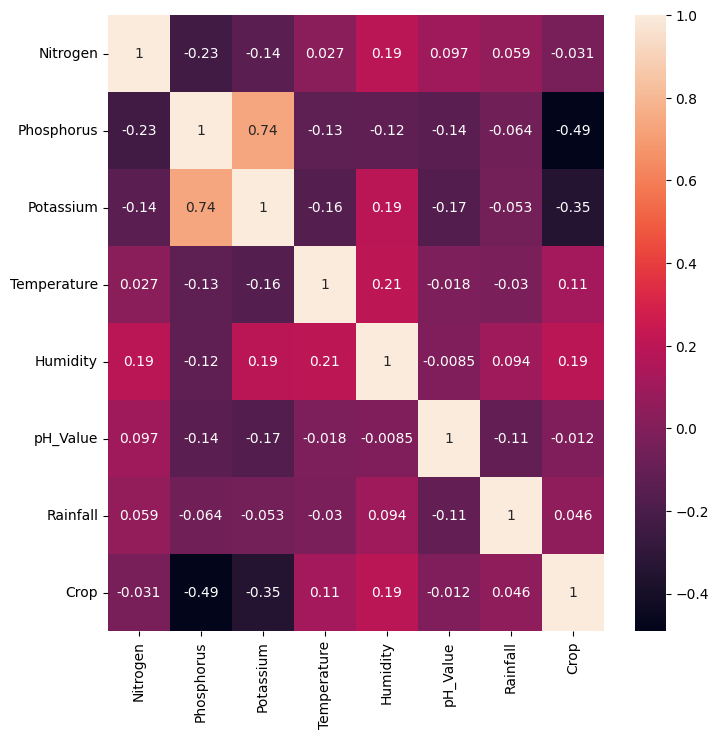

In [30]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)

plt.show()

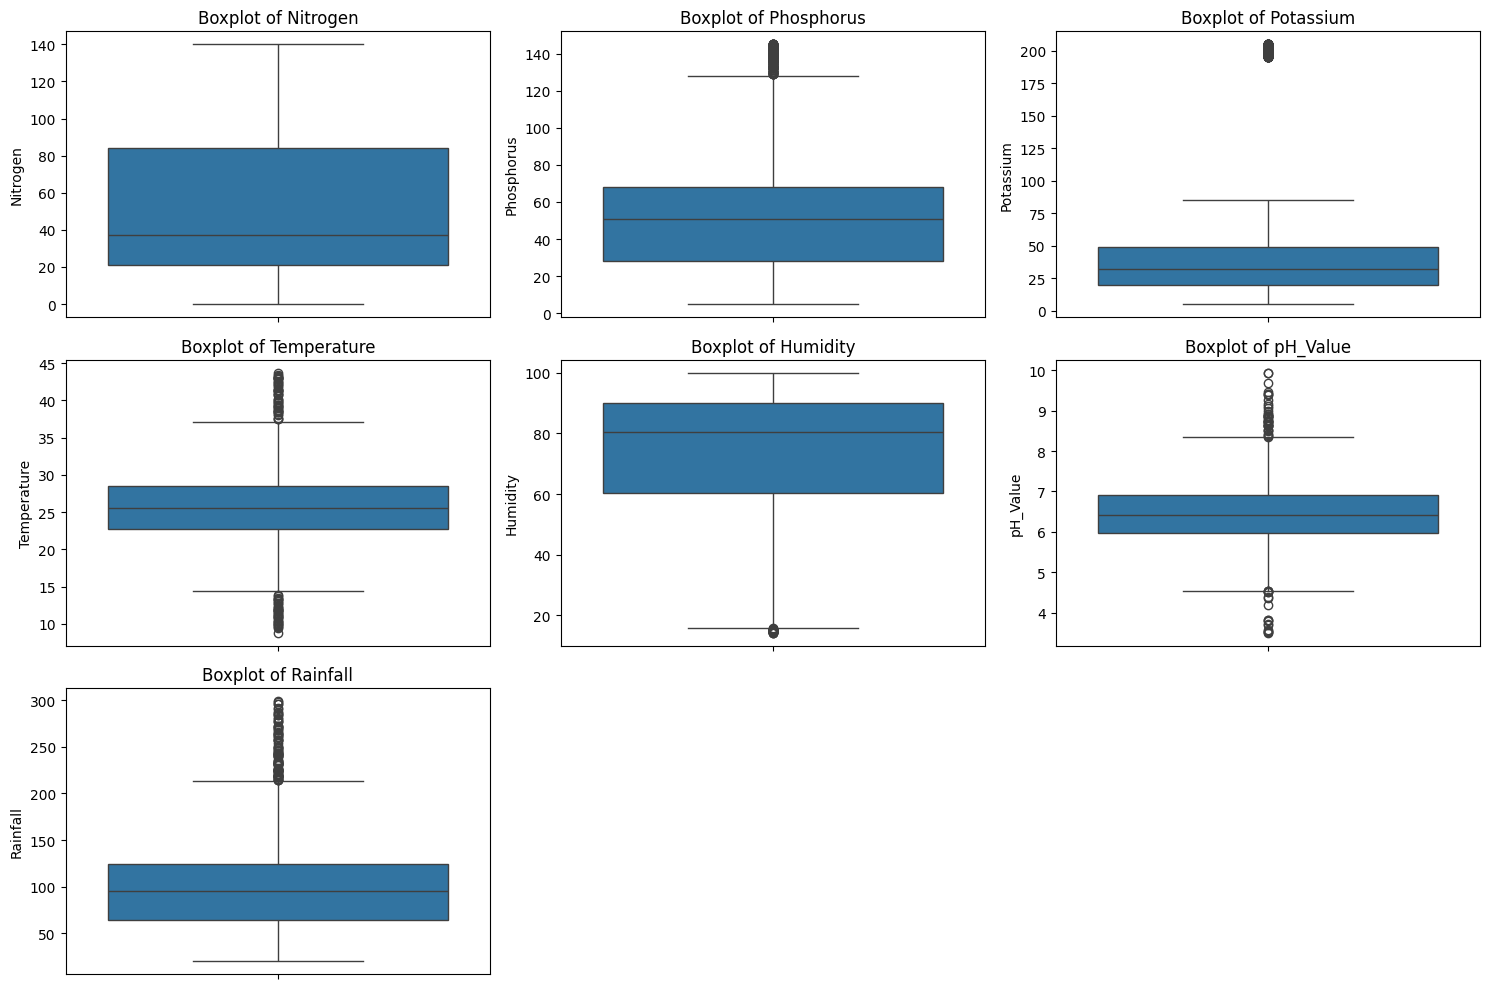

In [31]:
features = df.drop('Crop', axis=1).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [32]:
z_scores = np.abs(stats.zscore(df.drop('Crop', axis=1)))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers detected: {np.sum(outliers)}')

df_clean = df[~outliers]
df_clean.to_csv('cleaned_data.csv', index=False)

Number of outliers detected: 171


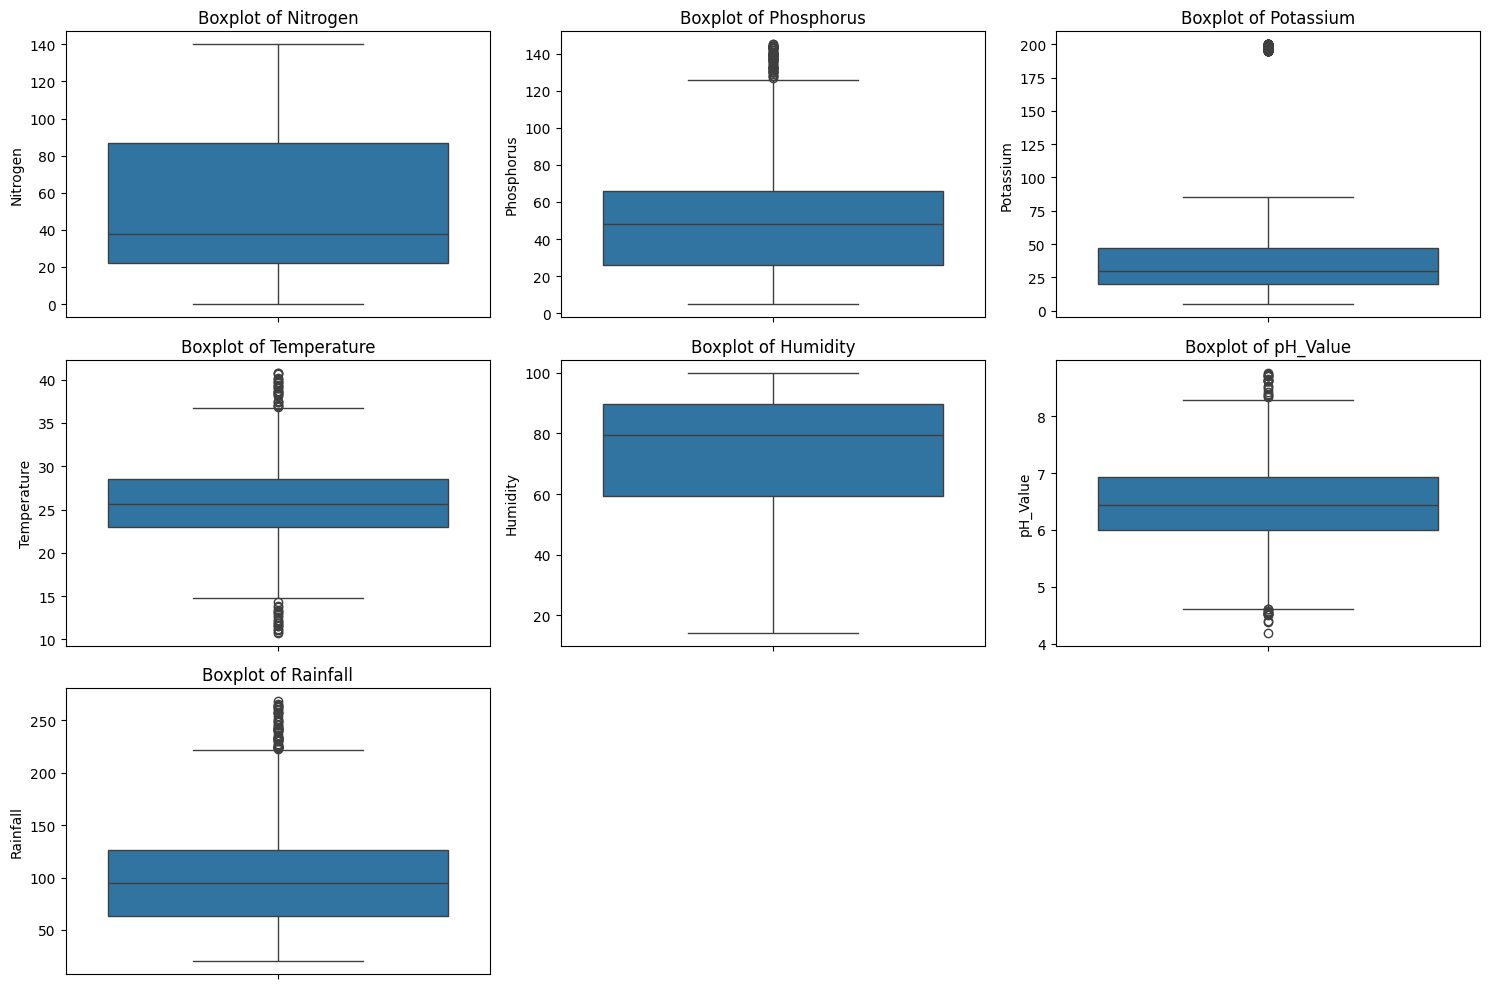

In [33]:
df_clean = pd.read_csv('cleaned_data.csv')

features = df_clean.drop('Crop', axis=1).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_clean[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [34]:
Q1 = df_clean['Potassium'].quantile(0.25)
Q3 = df_clean['Potassium'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

df_no_outliers = df_clean[(df_clean['Potassium'] >= lower_bound) & (df_clean['Potassium'] <= upper_bound)]

print(f'Number of outliers removed: {df_clean.shape[0] - df_no_outliers.shape[0]}')
df_no_outliers.to_csv('cleaned_data.csv', index=False)

Lower Bound: -20.5, Upper Bound: 87.5
Number of outliers removed: 102


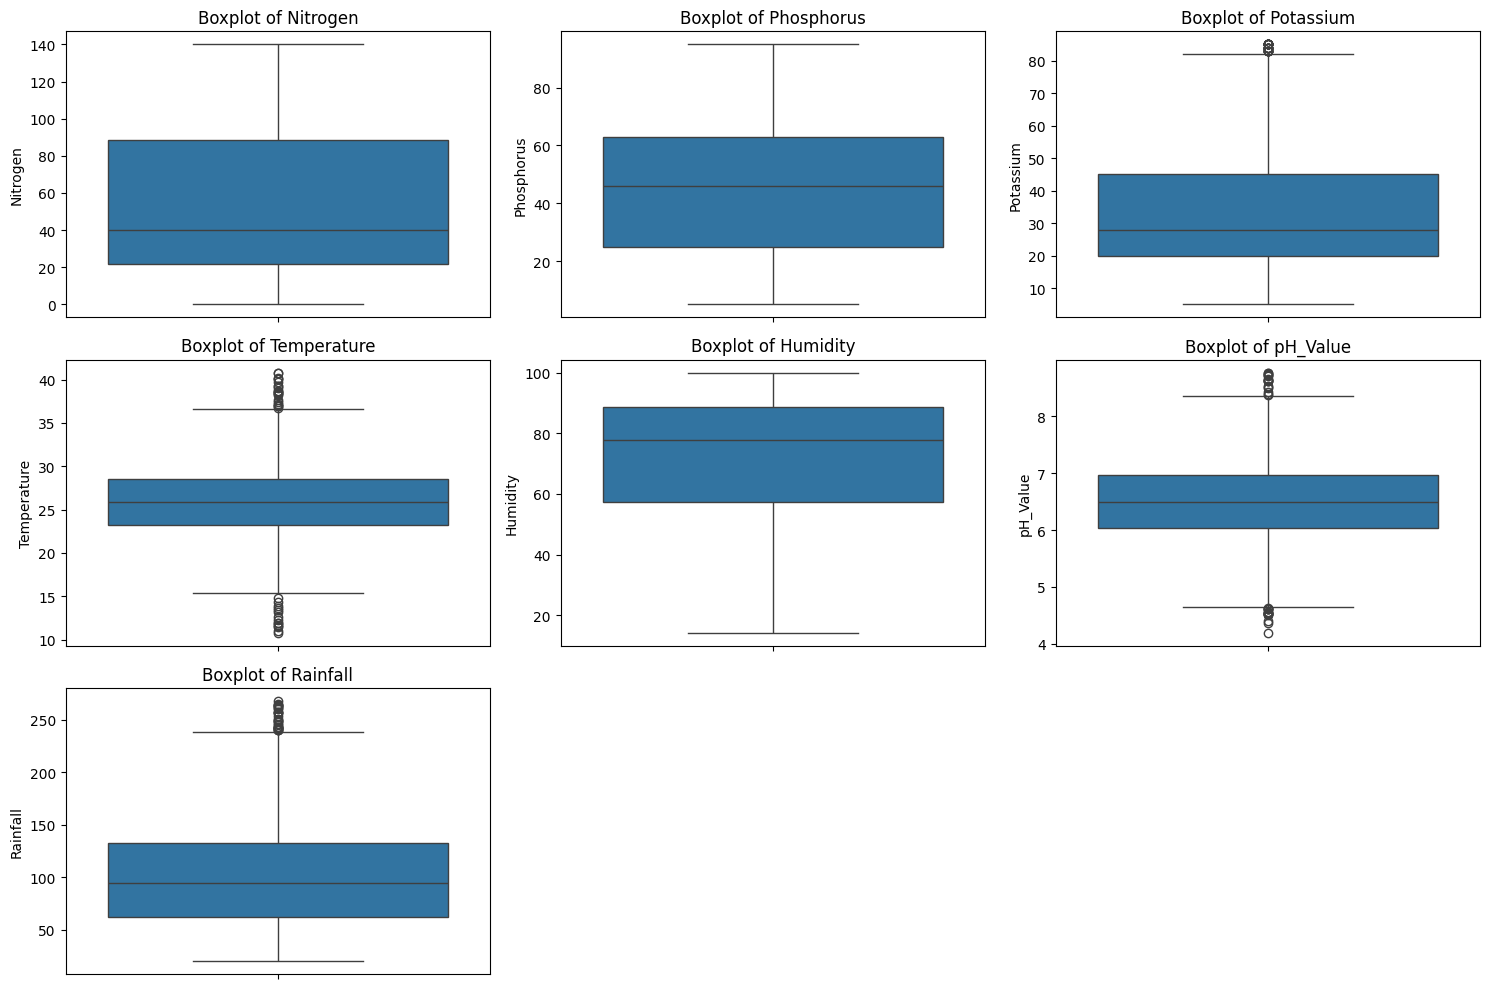

In [37]:
df_clean = pd.read_csv('cleaned_data.csv')

features = df_clean.drop('Crop', axis=1).columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_clean[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [35]:
data = pd.read_csv('cleaned_data.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Data has been split and saved to train_data.csv and test_data.csv")

Data has been split and saved to train_data.csv and test_data.csv


In [36]:
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (1541, 8)
Test Data Shape: (386, 8)
